# Visualizing the Movies Dataset

In this notebook, you will explore the movies dataset. This dataset has a number of variables for over 3000 movies.

## Imports

In [1]:
import altair as alt
alt.enable_mime_rendering()

## Dataset

In [2]:
movies = alt.load_dataset('movies')

In [3]:
movies.head()

Creative_Type Director Distributor  IMDB_Rating  IMDB_Votes  \
0                  None     None    Gramercy          6.1      1071.0   
1                  None     None      Strand          6.9       207.0   
2                  None     None   Lionsgate          6.8       865.0   
3                  None     None   Fine Line          NaN         NaN   
4  Contemporary Fiction     None     Trimark          3.4       165.0   

  MPAA_Rating Major_Genre  Production_Budget Release_Date  \
0           R        None          8000000.0    12-Jun-98   
1           R       Drama           300000.0     7-Aug-98   
2        None      Comedy           250000.0    28-Aug-98   
3        None      Comedy           300000.0    11-Sep-98   
4           R       Drama          1000000.0     9-Oct-98   

   Rotten_Tomatoes_Rating  Running_Time_min               Source  \
0                     NaN               NaN                 None   
1                     NaN               NaN                 None   
2                     NaN               NaN                 None   
3                    13.0               NaN                 None   
4                    62.0               NaN  Original Screenplay   

                        Title  US_DVD_Sales   US_Gross  Worldwide_Gross  
0              The Land Girls           NaN   146083.0         146083.0  
1      First Love, Last Rites           NaN    10876.0          10876.0  
2  I Married a Strange Person           NaN   203134.0         203134.0  
3        Let's Talk About Sex           NaN   373615.0         373615.0  
4                        Slam           NaN  1009819.0        1087521.0

## Blockbuster directors

Create a visualization to answer the following question:

> Which directors have directed the most (by worldwide gross revenue) blockbuster movies (above 500 million) and across which genres?

Build your visualization using:

* Bar marks
* Only include movies with a worldwide gross renevue of over 500 million
* X -> be the total worldwide gross renevue for that director
* Y -> director, sorted by the gross revenue
* Color -> genre

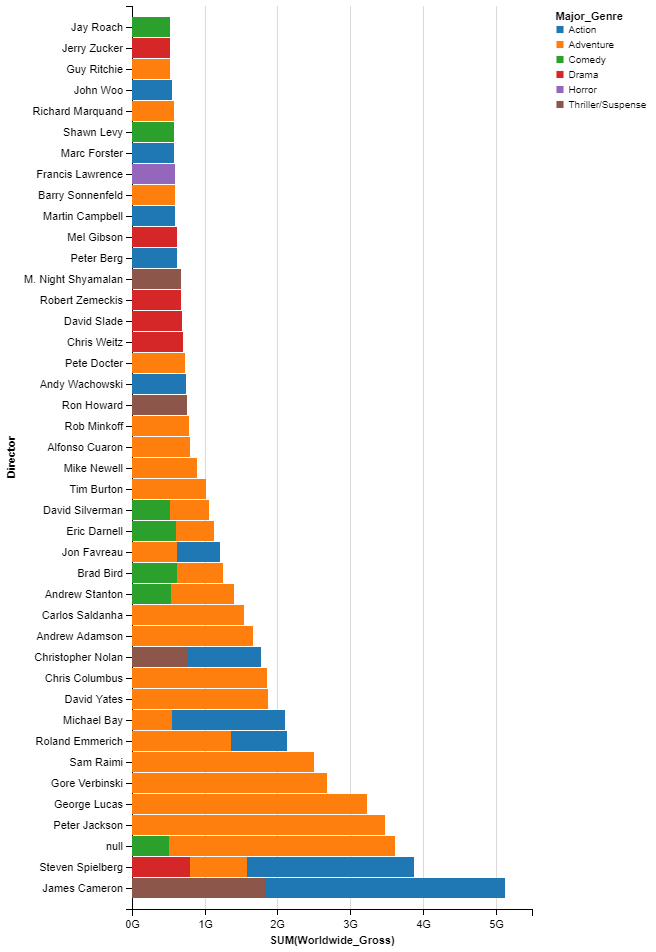

In [4]:
movies2 = movies[movies['Worldwide_Gross'] > 500000000]

alt.Chart(movies2).mark_bar().encode(
    alt.X('sum(Worldwide_Gross)'),
    alt.Y('Director', sort = alt.SortField('Worldwide_Gross', 'sum', 'ascending')),
    alt.Color('Major_Genre:N')
)

## Production versus gross

Create a visualization that answers the following question:

> How does the production budget affect the worldwide gross and how does the genre affect that?

Build your visualization using:

* Point marks
* X -> production budget on a log scale
* Y -> worldwide gross on a log scale
* Color -> genre

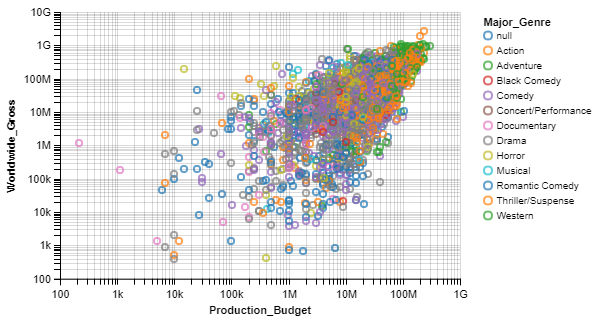

In [5]:
#alt.X('foo', scale = alt.Scale(...), sort = alt.SortField(...))
alt.Chart(movies).mark_point().encode(
    alt.X('Production_Budget', scale = alt.Scale(type='log')),
    alt.Y('Worldwide_Gross:Q', scale = alt.Scale(type='log')),
    alt.Color('Major_Genre')
)

## Worldwide gross over time

Create a visualization that answers the following question:

> How has the average worldwide gross revenue changed over time?

Build your visualization using:

* Line mark
* X -> year of release date
* Y -> average worldwide gross

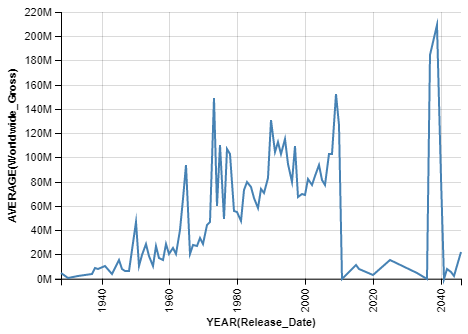

In [6]:
alt.Chart(movies).mark_line().encode(
    alt.X('Release_Date:T', timeUnit = 'year'), 
    alt.Y('Worldwide_Gross', aggregate = 'average')
)

## Distribution of ratings by genre

Create a visualization that answers the following question:

> How are the Rotten Tomotoes ratings distributed

Build your visualization using:

* Bar mark
* X -> binned Rotten Tomatoes rating with at most 50 bins
* Y -> number of records, with 5 labeled ticks
* Row -> genre
* Make the height of each cell smaller (`100px`)

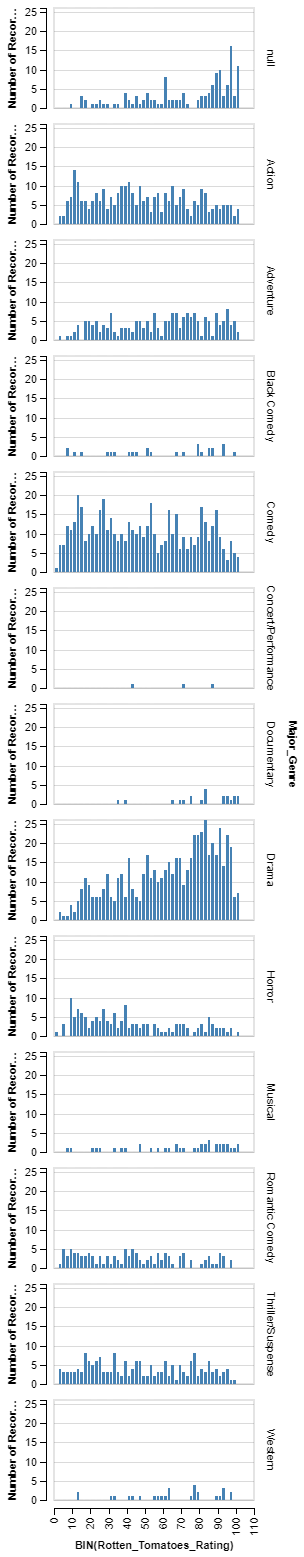

In [7]:
alt.Chart(movies).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating',bin = alt.Bin(maxbins = 50)),
    alt.Y('count(*)', axis = alt.Axis(ticks = 5)),
    alt.Row('Major_Genre')
).configure_cell(height = 100)

Explore the previous question with a different visualization using:

* Tick mark
* X -> Rotten Tomatoes rating
* Y -> genre

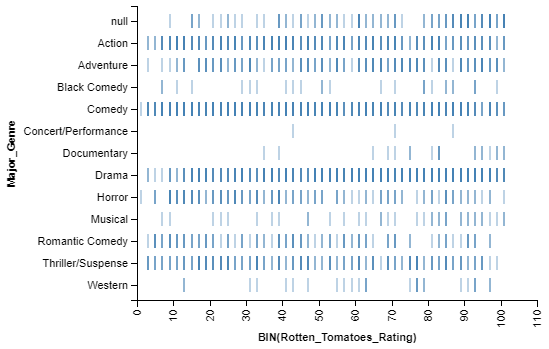

In [8]:
alt.Chart(movies).mark_tick().encode(
    alt.X('Rotten_Tomatoes_Rating',bin = alt.Bin(maxbins = 50)),
    alt.Y('Major_Genre'),
)